<a href="https://colab.research.google.com/github/DiegoCorona/BEDU-Proyecto-Final-Estudio-de-mercado-de-Apps-Moviles-y-prediccion-de-exito-/blob/main/Estudio_de_mercado_de_Apps_M%C3%B3viles_y_predicci%C3%B3n_de_exito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contexto del proyecto.

En el repositorio anterior [(Estudio de Mercado en las aplicaciones móviles)](https://github.com/DiegoCorona/Proyecto_BEDU_Modulo4_An-lisis_de_Datos_con_Python/blob/main/Proyecto_Modulo4_An%C3%A1lisis_de_Datos_con_Python.ipynb) se pudo estudiar, de una manera descriptiva y estadística el comportamiento de las características presentes en nuestro dataset. Pudimos notar que muchas de nuetras variables de estudio se encontraban sesgadas, y contabamos con gran variedad de variables categóricas. 

También, al final de todo el script, se trato de resolver el problema principal del proyecto de una manera simple: Ajustar una regresión logística a nuestros datos para así poder predecir si una aplicación movíl se podía considerar como exitosa o no exitosa, dadas ciertas características presentes en la misma aplicación. 

El resultado obtenido con está regresión logística era prometedor, ya que obtuvimos un **accuracy en el set de prueba de 0.7195729537366548**, este resultado no era nada malo, en apariencia, para un modelo con datos sin preprocesamiento y con los parámetros por default de la paquetería *Sklearn*.

El problema se vio al momento de obtener la matriz de confusión proporcionada por el modelo en el set de prueba: 

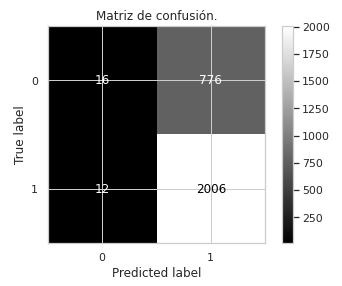

Se prodía notar que el modelo tenía grandes problemas para poder detectar los ejemplos pertenecientes a la clase **0**, es decir, aplicaciones que se considerán no exitosas.

Además, el accuracy tan grande se debió principalmente al desbalanceo entre ambas clase, esto provovó que el modelo predijerá la mayoría de las veces que el elemento pertenecía a la clase positiva, es deicr, el modelo no se esforzaba por tratar de predecir una clase a un ejemplo dadas las características, si no que se limitaba a predecir casi siempre la etiqueta con mayor proporción en el dataset.

Este mismo resultado se pudo corroborar al obtener la métrica AUC en el se de prueba, el cual fue **0.5071277692685027**, por lo que el modelo inicial tenía un pobre rendimiento.

Esta presente parte del proyecto se centra principalmente en solucionar este problema, tratar de obtener un modelo que pueda tener un mejor rendimiento dados los datos y, al mismo tiempo, mitigar el problema del desbalanceo en el dataset.

### Aspectos técnicos importantes.

Para algunas partes de este estudio haremos uso de métodos de sobremuestreo sobre el set de entremamiento, se utilizará el método **SMOTE** [(Técnica de sobremuestreo de minorías sintéticas)](https://programmerclick.com/article/50951545113/), que se basa en generar ejemplos artificiales sobre la clase menos representada en el dataset a partir de los ejemplos ya presentes en esta misma clase, esto es: toma *n* ejemplos en la clase menos representada y crea un ejemplo nuevo por, ya sea la variación de una características o el punto medio entre estos n ejemplos hasta poder crear un dataset con el mismo tamaño entre las etiquetas presentes en cada clase.

Se eligió este método de sobremuestreo por encima de los demás ya que le da un poco de variabilidad a los ejemplos en la clase menos representada, por lo que, para el modelo son ejemplos distintos, y puede evitar un poco el sobreajuste.

También se hará uso de diferentes algoritmos enfocados a clasificación, tales como **modelos lineales, Support Vector Machine, Random Forest y Neural Networks** así como diferentes arquitecturas y conjuntos de hiperpárametros.
 
Los resultados obtenidos se registrán en nuestra [Bitácora de resultados.](https://github.com/DiegoCorona/BEDU-Proyecto-Final-Estudio-de-mercado-de-Apps-Moviles-y-prediccion-de-exito-/blob/main/Bitacora_de_resultados.ipynb)

**Importante: Cabe mencionar que se eligió el 'MEJOR MODELO' tomando como métrica de referencia el AUC obtenido en el set de prueba de cada modelo, esto para no caer en confusiones con los resultados de otras métricas, como el accucary.**

### Funciones indispensables.

Las siguientes funciones son de gran ayuda para poder evaluar el comportamiento de distintos modelos dados los parámetros por default en la paquetería SKlearn, esto para guiarnos un poco sobre el camino que debemos seguir.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

def get_metrics(y_test, predictions, binary = False):
  '''
    Esta función retorna Accuracy, Precision, Recall y F1_score.
    binary: (default: False) Booleano que indica si la clasificación es multiclase o no
  '''
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

  if binary == False:
    option = 'macro'
    auc = None
  if binary == True:
    option = 'binary'
    auc = roc_auc_score(y_test, predictions)
  
  acc = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions, average= option)
  recall = recall_score(y_test, predictions, average= option)
  f1 = f1_score(y_test, predictions, average= option)
  print('Metricas en el set de prueba...')
  print('Accuracy: ', acc)
  print('Precision: ', precision)
  print('Recall: ', recall)
  print('f1_score: ', recall)
  print('AUC: ', auc)
  print('-'*70)
  

def alg_ML(X_train, y_train, X_test, y_test, binary = False):
  from sklearn.linear_model import LogisticRegression
  from sklearn.svm import SVC
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier

  logreg = LogisticRegression(max_iter = 10000)
  logreg.fit(X_train, y_train)
  logreg_pred = logreg.predict(X_test)
  print('Metrics for logistic regression:')
  get_metrics(y_test, logreg_pred, binary = binary)

  svm = SVC()
  svm.fit(X_train, y_train) 
  svm_pred = svm.predict(X_test)
  print('Metrics for Support Vector Machine:')
  get_metrics(y_test, svm_pred, binary = binary)

  dt = DecisionTreeClassifier()
  dt.fit(X_train, y_train)
  dt_pred = dt.predict(X_test)
  print('Metrics for Decision Tree:')
  get_metrics(y_test, dt_pred, binary = binary)

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)
  print('Metrics for Random Forrest: ')
  get_metrics(y_test, rf_pred, binary = binary)

## Checando los modelos con los parámetros por default.

Con los parámetros iniciales, obtuvimos lo siguiente:

* **Modelos sin sobremuestreo:** La regresión logística y SVM tuvieron el peor rendimiento en la métrica AUC, con un valor cercano de 0.5 en el set de prueba, los árboles de decisión y random forest presentaron un mejor desempeño, con valores AUC iguales a 0.6039935132200289 y 0.6320374061452954, respectivamente y con valores de accuracy mayores a 0.60. Esto nos da una noción que, estos dos últimos algoritmos podrían tener un mejor desempeño.

* **Modelos con sobremuestreo:** Después de aplicar sobremuestreo a el dataset de entrenamiento, se mejoró la métricas AUC con todos los algoritmos: La regresión logística tuvo 0.5982, y SVM 0.6223, mientras que árboles de decisión obtuvo 0.6347 (con un descenso en el accuracy), mientras que los bosques aleatorios obtuvieron un AUC igual a 0.6615 y un accuracy de 0.72251, presentando el mejor rendimiento tanto con sobremuetreo como sin sobremuetreo.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)

expanded = pd.get_dummies(data = data, columns = ['Categoria'])
expanded = expanded.drop(columns = ['App', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android', 'Rating'])

X = expanded.drop(columns= ['Exito_app'])
y = expanded['Exito_app']

X_norm = X.copy()
X_norm['Reviews'] = (X['Reviews'] - X['Reviews'].mean())/X['Reviews'].std()
X_norm['Instalaciones_minimas_estimadas'] = (X['Instalaciones_minimas_estimadas'] - X['Instalaciones_minimas_estimadas'].mean())/X['Instalaciones_minimas_estimadas'].std()
X_norm['Tamanio_MB'] = (X['Tamanio_MB'] - X['Tamanio_MB'].mean())/X['Tamanio_MB'].std()
X_norm['Precio'] = (X['Precio'])/(X['Precio'].max()-X['Precio'].min())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                    test_size = 0.2, 
                                                    random_state = 23)

print('-'*38)
print('|||    Modelos sin sobremuestreo   |||')
print('-'*38)
alg_ML(X_train, y_train, X_test, y_test, binary = True)

#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler, SMOTE
#Inicialización de los métodos de sobremuestreo
#SMOTE
smote = SMOTE(random_state = 1)

#SMOTE. Genera nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(X_train ,y_train)

print('-'*38)
print('|||    Modelos con sobremuestreo   |||')
print('-'*38)
alg_ML(dataSmote, targetSmote, X_test, y_test, binary= True)

--------------------------------------
|||    Modelos sin sobremuestreo   |||
--------------------------------------
Metrics for logistic regression:
Metricas en el set de prueba...
Accuracy:  0.7262540021344717
Precision:  0.7259615384615384
Recall:  1.0
f1_score:  1.0
AUC:  0.5019417475728155
----------------------------------------------------------------------
Metrics for Support Vector Machine:
Metricas en el set de prueba...
Accuracy:  0.7262540021344717
Precision:  0.7262032085561497
Recall:  0.9992641648270787
f1_score:  0.9992641648270787
AUC:  0.5025447037727627
----------------------------------------------------------------------
Metrics for Decision Tree:
Metricas en el set de prueba...
Accuracy:  0.6766275346851655
Precision:  0.7837226827430294
Recall:  0.7652685798381162
f1_score:  0.7652685798381162
AUC:  0.6039935132200289
----------------------------------------------------------------------
Metrics for Random Forrest: 
Metricas en el set de prueba...
Accuracy:  0.73

## Función para la obtención automática de datos normalizados y particionados por entrenamiento y prueba.

Las siguientes funciones nos fueron de gran utilidad para el preprocesamiento de los datos antes de aplicar algoritmos de redes neuronales:


In [ ]:
def process_data():
  #Cargar el dataset.
  data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)

  #Remover columnas inecesarias.
  data_clean = data.drop(columns = ['App', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android'])
  #expanded = pd.get_dummies(data = data_clean, columns = ['Categoria'])

  #Normalizar valores a un rango entre 0 y 1.
  col_norm = ['Tamanio_MB',	'Instalaciones_minimas_estimadas', 'Precio']
  df_norm = data_clean[col_norm]
  df_norm_v = data_clean[col_norm].apply(lambda x: ((x-x.min()) / (x.max()-x.min())))
  y_data = data_clean['Exito_app']

  #Obtener datos de entrenamiento y prueba.
  x_train, x_test, y_train, y_test = train_test_split(df_norm_v, y_data, test_size = 0.4, random_state = 24)
  return x_train, x_test, y_train, y_test

## Función para la obtención automática del mapa de caracteristicas del dataset.

In [ ]:
def crear_columnas_caracteristicas():
  feature_tamanio = tf.feature_column.numeric_column('Tamanio_MB')
  feature_instalaciones_minimas = tf.feature_column.numeric_column('Instalaciones_minimas_estimadas')
  feature_precio = tf.feature_column.numeric_column('Precio')

  feature_columns = [feature_tamanio, feature_instalaciones_minimas, feature_precio]
  return feature_columns

## Constructor de funcion de entrada.

In [ ]:
def make_input_fn(data_df, label_df, num_epochs = 1000, shuffle = True, batch_size = 32):
  def input_function(): #Funcion interna, esta sera regresada.
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000) #Aleatorizar el orden de los datos.
    ds = ds.batch(batch_size).repeat(num_epochs)  #Separar el conjunto de datos en lotes de 32 y repetir el proceso por el numero de epochs.
    return ds #Regresar un lote del dataset.
  return input_function #Regresar un objeto de la funcion para su uso.

## Redes Neuronales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#Tensorflow related.
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from tensorflow import keras
%tensorflow_version 2.x

In [ ]:
#Cargar el dataset.
data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)
(pd.concat([data.head(2), data.tail(2)], axis=0, ignore_index=True)) #(9366, 15)

,App,Categoria,Reviews,Tamanio_MB,Instalaciones_minimas_estimadas,App_gratuita,App_pago,Precio,Rating_del_contenido,Ultimo_updated,Anio_ultimo_updated,Version_actual,Version_Android,Rating,Exito_app
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19.0,10000,1,0,0.0,Everyone,"January 7, 2018",2018,1.0.0,4.0.3 and up,4.1,1
1,Coloring book moana,ART_AND_DESIGN,967,14.0,500000,1,0,0.0,Everyone,"January 15, 2018",2018,2.0.0,4.0.3 and up,3.9,0
2,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,7.4,1000,1,0,0.0,Mature 17+,"January 19, 2015",2015,Varies with device,Varies with device,4.5,1
3,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,398307,19.0,10000000,1,0,0.0,Everyone,"July 25, 2018",2018,Varies with device,Varies with device,4.5,1


### Remover columnas inecesarias.

In [ ]:
#Remover columnas inecesarias.
data_clean = data.drop(columns = ['App', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android'])
expanded = pd.get_dummies(data = data_clean, columns = ['Categoria'])
expanded.head(1)

,Reviews,Tamanio_MB,Instalaciones_minimas_estimadas,App_gratuita,App_pago,Precio,Rating,Exito_app,Categoria_ART_AND_DESIGN,Categoria_AUTO_AND_VEHICLES,Categoria_BEAUTY,Categoria_BOOKS_AND_REFERENCE,Categoria_BUSINESS,Categoria_COMICS,Categoria_COMMUNICATION,Categoria_DATING,Categoria_EDUCATION,Categoria_ENTERTAINMENT,Categoria_EVENTS,Categoria_FAMILY,Categoria_FINANCE,Categoria_FOOD_AND_DRINK,Categoria_GAME,Categoria_HEALTH_AND_FITNESS,Categoria_HOUSE_AND_HOME,Categoria_LIBRARIES_AND_DEMO,Categoria_LIFESTYLE,Categoria_MAPS_AND_NAVIGATION,Categoria_MEDICAL,Categoria_NEWS_AND_MAGAZINES,Categoria_PARENTING,Categoria_PERSONALIZATION,Categoria_PHOTOGRAPHY,Categoria_PRODUCTIVITY,Categoria_SHOPPING,Categoria_SOCIAL,Categoria_SPORTS,Categoria_TOOLS,Categoria_TRAVEL_AND_LOCAL,Categoria_VIDEO_PLAYERS,Categoria_WEATHER
0,159,19.0,10000,1,0,0.0,4.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Normalizacion.

In [ ]:
col_norm = ['Tamanio_MB',	'Instalaciones_minimas_estimadas', 'Precio']
df_norm = data_clean[col_norm]
df_norm_v = data_clean[col_norm].apply(lambda x: ((x-x.min()) / (x.max()-x.min())))
y_data = data_clean['Exito_app']
df_norm_v.head(10)

,Tamanio_MB,Instalaciones_minimas_estimadas,Precio
0,0.189937,0.00001,0.0
1,0.139933,0.00050,0.0
2,0.086929,0.00500,0.0
3,0.249941,0.05000,0.0
4,0.027924,0.00010,0.0
5,0.055926,0.00005,0.0
6,0.189937,0.00005,0.0
7,0.289945,0.00100,0.0
8,0.329948,0.00100,0.0
9,0.030924,0.00001,0.0


### Definir columnas de caracteristicas.

In [ ]:
feature_tamanio = tf.feature_column.numeric_column('Tamanio_MB')
feature_instalaciones_minimas = tf.feature_column.numeric_column('Instalaciones_minimas_estimadas')
feature_precio = tf.feature_column.numeric_column('Precio')
#feature_rating = tf.feature_column.numeric_column('Rating')

feature_columns = [feature_tamanio, feature_instalaciones_minimas, feature_precio]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_norm_v, y_data, test_size = 0.4, random_state = 24)
train_function = make_input_fn(x_train, y_train)
test_function = make_input_fn(x_test, y_test, num_epochs=1)

### Clasificador lineal.

In [ ]:
modelo = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7i3z6qpl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Entrenar el modelo.

In [ ]:
modelo.train(input_fn=train_function, steps=10000)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7i3z6qpl/model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 8000...
INFO:tensorflow:Saving checkpoints for 8000 into /tmp/tmp7i3z6qpl/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 8000...
INFO:tensorflow:loss = 0.72042805, step = 8000
INFO:tensorflow:global_step/sec: 550.485
INFO:tensorflow:loss = 0.44830984, step = 8100 (0.187 sec)
INFO:tensorflow:global_step/sec: 993.179
INFO:tensorflow:loss = 0.60950166, step = 8200 (0.097 sec)
INFO:tensorflow:global_step/sec: 976.312
INFO:tensorflow:loss = 0.6846503, step = 8300 (0.103 sec)
INFO:tensorflow:global_step/sec: 862.27
INFO:tensorflow:loss = 0.58164537, step = 8400 (0.118 sec)
INFO:tensorflow:global_step/sec: 890.448
INF

### Resultados.

Para este proceso usando redes neuronales se obtubo un AUC igual a 0.59609205, resultado que mejoró con los cambios en los parámetros del medelo pero no siendo suficiente para mejorar el resultado obtenido con Bosques aleatorios.

In [ ]:
results = modelo.evaluate(test_function)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-19T00:06:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7i3z6qpl/model.ckpt-18000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.74095s
INFO:tensorflow:Finished evaluation at 2021-06-19-00:06:07
INFO:tensorflow:Saving dict for global step 18000: accuracy = 0.72858286, accuracy_baseline = 0.7280491, auc = 0.59609205, auc_precision_recall = 0.79599285, average_loss = 0.58132637, global_step = 18000, label/mean = 0.7280491, loss = 0.5794403, precision = 0.72856, prediction/mean = 0.72791976, recall = 0.99963343
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18000: /tmp/tmp7i3z6qpl/model.ckpt-18000


También, el accuracy presentado fue de 0.87, pero tal como el presentado con regresión logística, puede ser engañoso dada la métrica AUC.

In [ ]:
results['accuracy']

0.8791033

## Red Neuronal Profunda (DNN).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt

#Tensorflow related.
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from tensorflow import keras
%tensorflow_version 2.x

### Obtener datos base.

In [ ]:
DNNX_Train, DNNX_Test, DNNY_Train, DNNY_Test = process_data()
columnas_de_caracteristica = crear_columnas_caracteristicas()

DNNtrain_function = make_input_fn(DNNX_Train, DNNY_Train)
DNNtest_function = make_input_fn(DNNX_Test, DNNY_Test, num_epochs=1)

### Crear modelo.

In [ ]:
dnnmodel = tf.estimator.DNNClassifier(
    hidden_units = [20,20],
    feature_columns = columnas_de_caracteristica,
    n_classes = 2,
    activation_fn=tf.nn.softmax,
    dropout=None,
    optimizer=tf.optimizers.Adam(learning_rate=0.01)
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpuym3rgn7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Entrenar el modelo.

In [ ]:
history = dnnmodel.train(input_fn=DNNtrain_function, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpuym3rgn7/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.66605735, step = 0
INFO:tensorflow:global_step/sec: 493.453
INFO:tensorflow:loss = 0.53106827, step = 100 (0.207 sec)
INFO:tensorflow:global_step/sec: 783.259
INFO:tensorflow:loss = 0.63064533, step = 200 (0.128 sec)
INFO:tensorflow:global_step/sec: 834.819
INFO:tensorflow:loss = 0.55996466, step = 300 (0.117 sec)
INFO:tensorflow:global_step/sec: 804.709
INFO:tensorflow:loss = 0.45071414, step = 400 (0.127 sec)
INFO:tensorflow:global_step/sec: 782.302
INFO:tensorflow:loss = 0.68594784, step = 500 (0.125 sec)


### Evaluar el modelo.

In [ ]:
dnnmodel.evaluate(DNNtest_function)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-19T00:55:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpuym3rgn7/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.83280s
INFO:tensorflow:Finished evaluation at 2021-06-19-00:55:10
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.72884977, accuracy_baseline = 0.7280491, auc = 0.64797854, auc_precision_recall = 0.8358711, average_loss = 0.55344886, global_step = 10000, label/mean = 0.7280491, loss = 0.5538232, precision = 0.7287547, prediction/mean = 0.7378426, recall = 0.99963343
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmpuym3rgn7/model.ckpt-10000


{'accuracy': 0.72884977,
 'accuracy_baseline': 0.7280491,
 'auc': 0.64797854,
 'auc_precision_recall': 0.8358711,
 'average_loss': 0.55344886,
 'global_step': 10000,
 'label/mean': 0.7280491,
 'loss': 0.5538232,
 'precision': 0.7287547,
 'prediction/mean': 0.7378426,
 'recall': 0.99963343}

### Predicciones y analisis.

In [ ]:
predicciones = list(dnnmodel.predict(input_fn=test_function))
prediccion = [p["class_ids"][0] for p in predicciones]
data = classification_report(DNNY_Test, prediccion)
conmat = confusion_matrix(DNNY_Test, prediccion)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpuym3rgn7/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


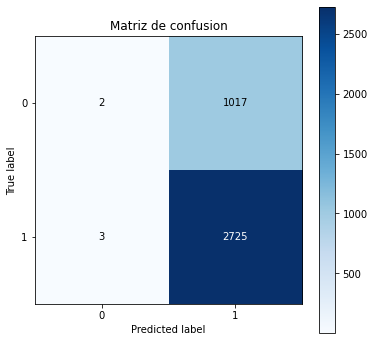

In [ ]:
skplt.metrics.plot_confusion_matrix(DNNY_Test, prediccion, figsize=(6,6), title="Matriz de confusion")

El uso de redes neuronales profundas pudo mejorar un poco las métricas, pero, como se puede apreciar en la matriz de confusión anterior, el modelo tiene graves problemas para predecir la clase 0, por lo que el rendimiento no es el esperado.

## Maquina de soporte de vectores.

Para SVM se utilizará el método MinMaxScaler contenido en skLearn para preprocesar un poco el dataset, pero también se provará preprocesando solo algunas columnas del dataset en específico.

También se hará uso de la función **GridSearchCV**, la cual, por medio de un diccionario de hiperparámetros puede ajustar tantos modelos como combinación de parámetros se puedan realizar, al mismo tiempo de poder evaluar los modelos por medio de validación cruzada.

El diccionario de parámetros solo tomará en cuenta el valor 'C', que regula la regularización del modelo, y el 'kernel', el cual se encarga de tomar diferentes funciones de similaridad entre los ejemplos en el dataset.

En estos modelos se práctica con sobremuestreo en todos los modelos, ya que así se obtuvo mejor rendimiento con los parámetros por defecto.

### Utilizando MinMaxScaler

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import roc_auc_score

data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)

expanded = pd.get_dummies(data = data, columns = ['Categoria'])
expanded = expanded.drop(columns = ['App', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android', 'Rating'])

X = expanded.drop(columns= ['Exito_app'])
y = expanded['Exito_app']

#### MinMax Scaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 23)

smote = SMOTE(random_state = 1)
dataSmote, targetSmote = smote.fit_resample(X_train ,y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### Parametros del modelo.
params = {'C': [0.01, 0.1, 1, 5, 15, 25, 50, 75, 100, 120, 150, 170, 200],
          'kernel': ['linear', 'rbf']} 
svm = SVC(max_iter= 20000)      
best_svm = GridSearchCV(svm, param_grid= params, scoring= 'roc_auc', cv = 3)  
best_svm.fit(dataSmote, targetSmote);

La siguente tabla muestra los resultados obtenidos por las combinaciones de parámetros en los modelos.

La columna **mean_test_score**, muestra el AUC promedio entre los tres set de validación cruzada creados al momento de ejecutar la función, notamos que la combinación de 'C': 170 y 'kernel': 'rbf' obtuvo el mejor AUC promedio con 0.680045.	

In [ ]:
svm_results = pd.DataFrame(best_svm.cv_results_)
svm_results[['params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].to_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/svm_results_MinMaxScaler.csv')
svm_results[['params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.01, 'kernel': 'linear'}",0.589057,0.611096,0.605393,0.601849,0.009340,25
1,"{'C': 0.01, 'kernel': 'rbf'}",0.585096,0.605405,0.607569,0.599357,0.010122,26
2,"{'C': 0.1, 'kernel': 'linear'}",0.610191,0.629662,0.644045,0.627966,0.013873,22
3,"{'C': 0.1, 'kernel': 'rbf'}",0.599498,0.625668,0.626846,0.617338,0.012624,24
4,"{'C': 1, 'kernel': 'linear'}",0.618139,0.636755,0.655054,0.636650,0.015071,16
5,"{'C': 1, 'kernel': 'rbf'}",0.619665,0.639596,0.645340,0.634867,0.011002,17
6,"{'C': 5, 'kernel': 'linear'}",0.622971,0.645070,0.662085,0.643376,0.016013,14
7,"{'C': 5, 'kernel': 'rbf'}",0.637671,0.660240,0.659482,0.652464,0.010465,12
8,"{'C': 15, 'kernel': 'linear'}",0.642380,0.662834,0.663132,0.656116,0.009713,10
9,"{'C': 15, 'kernel': 'rbf'}",0.650454,0.672292,0.669825,0.664190,0.009765,9


Y al momento de probar el modelo en el set de prueba se ubtuvo un AUC igual a 0.611491887953021, es decir, un resultado poco peor a los obtenidos al inicio, con los parámetros predeterminados, por lo que, jugar con MInMAxScaler no cambio demasiado los resultados ya obtenidos.

In [ ]:
pred_scaled = best_svm.predict(X_test)
roc_auc_score(y_test, pred_scaled)

0.611491887953021

### Escalando algunas variables de manera indivudual.

Probando solo escalando algunas variables, se escalarán las columnas **Reviews, Instalaciones_minimas_estimadas, Tamanio_MB y Precio**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)

expanded = pd.get_dummies(data = data, columns = ['Categoria'])
expanded = expanded.drop(columns = ['App', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android', 'Rating'])

X = expanded.drop(columns= ['Exito_app'])
y = expanded['Exito_app']

#### Escalando variables de manera individual.
X_norm_ind = X.copy()
X_norm_ind['Reviews'] = (X['Reviews'] - X['Reviews'].mean())/X['Reviews'].std()
X_norm_ind['Instalaciones_minimas_estimadas'] = (X['Instalaciones_minimas_estimadas'] - X['Instalaciones_minimas_estimadas'].mean())/X['Instalaciones_minimas_estimadas'].std()
X_norm_ind['Tamanio_MB'] = (X['Tamanio_MB'] - X['Tamanio_MB'].mean())/X['Tamanio_MB'].std()
X_norm_ind['Precio'] = (X['Precio'])/(X['Precio'].max()-X['Precio'].min())

X_train, X_test, y_train, y_test = train_test_split(X_norm_ind, y, test_size = 0.2, random_state = 23)

smote = SMOTE(random_state = 1)
dataSmote_ind, targetSmote_ind = smote.fit_resample(X_train ,y_train)


In [ ]:
### Parametros del modelo.
params = {'C': [0.01, 0.1, 1, 5, 15, 25, 50, 75, 100, 120, 150, 170, 200],
          'kernel': ['linear', 'rbf']} 
svm = SVC(max_iter= 20000)      
best_svm_ind = GridSearchCV(svm, param_grid= params, scoring= 'roc_auc', cv = 3)  
best_svm_ind.fit(dataSmote_ind, targetSmote_ind);

Con este proceso, se obtuvo que con la combinación 'C': 200, y 'kernel': 'rbf', se obtiene un AUC promedio en los set de validación igual a 0.733173, superando el 0.68 usando MinMaxScaler, por lo que, en apariencia, se obtuvo un modelo ligeramente mejor.

In [ ]:
svm_results_ind = pd.DataFrame(best_svm_ind.cv_results_)
svm_results_ind[['params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']].to_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/svm_results_individual.csv')
svm_results_ind[['params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.01, 'kernel': 'linear'}",0.612487,0.637065,0.634075,0.627876,0.010949,18
1,"{'C': 0.01, 'kernel': 'rbf'}",0.600270,0.626778,0.620930,0.615993,0.011371,20
2,"{'C': 0.1, 'kernel': 'linear'}",0.636906,0.652906,0.660073,0.649962,0.009684,17
3,"{'C': 0.1, 'kernel': 'rbf'}",0.641754,0.669762,0.666733,0.659416,0.012550,13
4,"{'C': 1, 'kernel': 'linear'}",0.653533,0.661885,0.667781,0.661066,0.005845,12
5,"{'C': 1, 'kernel': 'rbf'}",0.669816,0.696608,0.700007,0.688810,0.013503,11
6,"{'C': 5, 'kernel': 'linear'}",0.655866,0.659004,0.661579,0.658817,0.002336,14
7,"{'C': 5, 'kernel': 'rbf'}",0.687784,0.704136,0.713753,0.701891,0.010720,10
8,"{'C': 15, 'kernel': 'linear'}",0.650857,0.643755,0.671427,0.655346,0.011735,15
9,"{'C': 15, 'kernel': 'rbf'}",0.700680,0.709599,0.722815,0.711032,0.009093,9


Probando este modelo en el set de prueba, se mejoró el AUC obteniendo 0.6530865785093265, empatando el rendimiento obtenido con los paramétros por defecto de el modelo usando Random Forest.

In [ ]:
pred_scaled = best_svm_ind.predict(X_test)
roc_auc_score(y_test, pred_scaled)

0.6530865785093265

In [5]:
def get_metrics(y_test, predictions, binary = False):
  '''
    Esta función retorna Accuracy, Precision, Recall y F1_score.
    binary: (default: False) Booleano que indica si la clasificación es multiclase o no
  '''
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

  if binary == False:
    option = 'macro'
    auc = None
  if binary == True:
    option = 'binary'
    auc = roc_auc_score(y_test, predictions)
  
  acc = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions, average= option)
  recall = recall_score(y_test, predictions, average= option)
  f1 = f1_score(y_test, predictions, average= option)
  print('Metricas en el set de prueba...')
  print('Accuracy: ', acc)
  print('Precision: ', precision)
  print('Recall: ', recall)
  print('f1_score: ', recall)
  print('AUC: ', auc)
  print('-'*70)
  

def alg_ML(X_train, y_train, X_test, y_test, binary = False):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import plot_confusion_matrix


  KNN = KNeighborsClassifier(metric = 'euclidean',n_neighbors=3)
  KNN.fit(X_train, y_train)
  KNN_pred = KNN.predict(X_test)
  print('Metrics for KNN(euclidean):')
  get_metrics(y_test, KNN_pred, binary = binary)
  plot_confusion_matrix(KNN, X_test, y_test, values_format='.6g', cmap = 'RdYlBu_r')
  plt.title('Matriz de confusión.')
  plt.show();


## KNN

--------------------------------------
|||    Modelos sin sobremuestreo   |||
--------------------------------------
Metrics for KNN(euclidean):
Metricas en el set de prueba...
Accuracy:  0.7155816435432231
Precision:  0.7739071038251366
Recall:  0.8486891385767791
f1_score:  0.8486891385767791
AUC:  0.6172944765240111
----------------------------------------------------------------------


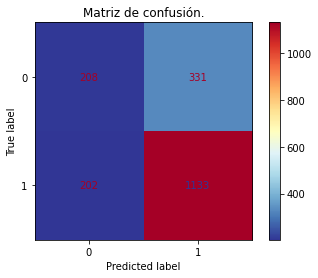

--------------------------------------
|||    Modelos con sobremuestreo   |||
--------------------------------------
Metrics for KNN(euclidean):
Metricas en el set de prueba...
Accuracy:  0.683564567769477
Precision:  0.8160136286201022
Recall:  0.7176029962546816
f1_score:  0.7176029962546816
AUC:  0.6584304406134263
----------------------------------------------------------------------


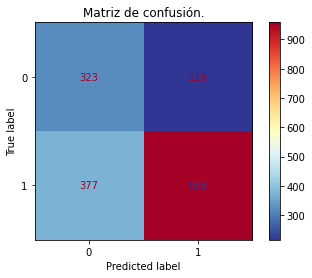

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)

expanded = pd.get_dummies(data = data, columns = ['Categoria'])
expanded = expanded.drop(columns = ['App', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android', 'Rating'])

X = expanded.drop(columns= ['Exito_app'])
y = expanded['Exito_app']

X_norm = X.copy()
X_norm['Reviews'] = (X['Reviews'] - X['Reviews'].mean())/X['Reviews'].std()
X_norm['Instalaciones_minimas_estimadas'] = (X['Instalaciones_minimas_estimadas'] - X['Instalaciones_minimas_estimadas'].mean())/X['Instalaciones_minimas_estimadas'].std()
X_norm['Tamanio_MB'] = (X['Tamanio_MB'] - X['Tamanio_MB'].mean())/X['Tamanio_MB'].std()
X_norm['Precio'] = (X['Precio'])/(X['Precio'].max()-X['Precio'].min())



from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state=9)



print('-'*38)
print('|||    Modelos sin sobremuestreo   |||')
print('-'*38)
alg_ML(X_train, y_train, X_test, y_test, binary = True)

#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler, SMOTE
#Inicialización de los métodos de sobremuestreo
#SMOTE
smote = SMOTE(random_state = 1)

#SMOTE. Genera nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(X_train ,y_train)

print('-'*38)
print('|||    Modelos con sobremuestreo   |||')
print('-'*38)
alg_ML(dataSmote, targetSmote, X_test, y_test, binary= True)

# Random Forest

En el caso de Random Forest, a partir de las métricas obtenidas al implementar los algoritmos de Machine Learning con los parámetros por default, se modificó la cantidad de estimadores que se utilizaba (n =10, 20, 50, 100, 200, 500, 800, 1000, 5000, 10000) considerando dos casos: Dataset sin y con sobremuesteo.

Como resultado de lo anterior se obtuvieron las mejores métricas considerando 10 árboles de decisión sin sobremuestreo y con 5000 árboles de decision considerando sobremuesteo. A continuación se muestran las métricas para los dos casos anteriores, así como la matriz de confusión para cada uno de ellos.

Cabe señalar que al aumentar la cantidad de árboles de decisión que se utilizan, la cantidad de recursos necesarios también aumenta; por lo cual, utilizar Random Forest considerando menos de 1000 estimadores permite tener tiempos de ejecución menores a los 10 segundos dentro del Colab. 

Finalmente, los resultados restantes sobre las métricas y los tiempos de ejecución para los demás casos se encuentran disponibles en la bitácora. 


In [ ]:
!pip install scikit-plot

In [ ]:
def random_forest(X_train, y_train, X_test, y_test,estimador, binary = False):
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import plot_confusion_matrix
  import timeit
  import plotly as px
  import seaborn as sns
  import matplotlib.pyplot as plt


  start = timeit.default_timer()
  rf = RandomForestClassifier(n_estimators = estimador, random_state = 120)
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)
  print(f'Metrics for Random Forrest (n={estimador}) ')
  get_metrics(y_test, rf_pred, binary = binary)
  stop = timeit.default_timer()
  print(f'Tiempo de ejecución: {stop-start}\n\n')
  plot_confusion_matrix(rf, X_test, y_test, values_format='.6g', cmap = 'RdYlBu_r')
  plt.title('Matriz de confusión.')
  plt.show();


--------------------------------------
|||    Modelos sin sobremuestreo   |||
--------------------------------------
Metrics for Random Forrest (n=10) 
Metricas en el set de prueba...
Accuracy:  0.7337246531483458
Precision:  0.8115942028985508
Recall:  0.8241353936718175
f1_score:  0.8241353936718175
AUC:  0.6596405123698893
----------------------------------------------------------------------
Tiempo de ejecución: 0.1240350349999062




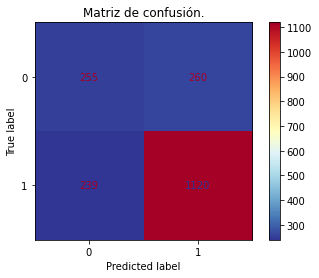

--------------------------------------
|||    Modelos con sobremuestreo   |||
--------------------------------------
Metrics for Random Forrest (n=5000) 
Metricas en el set de prueba...
Accuracy:  0.727854855923159
Precision:  0.8189331329827197
Recall:  0.8020603384841796
f1_score:  0.8020603384841796
AUC:  0.667049586717818
----------------------------------------------------------------------
Tiempo de ejecución: 82.61296411999956




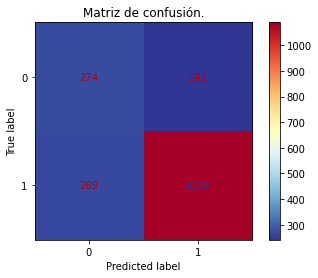

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=120,
                       verbose=0, warm_start=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)

expanded = pd.get_dummies(data = data, columns = ['Categoria'])
expanded = expanded.drop(columns = ['App', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android', 'Rating'])

X = expanded.drop(columns= ['Exito_app'])
y = expanded['Exito_app']

X_norm = X.copy()
X_norm['Reviews'] = (X['Reviews'] - X['Reviews'].mean())/X['Reviews'].std()
X_norm['Instalaciones_minimas_estimadas'] = (X['Instalaciones_minimas_estimadas'] - X['Instalaciones_minimas_estimadas'].mean())/X['Instalaciones_minimas_estimadas'].std()
X_norm['Tamanio_MB'] = (X['Tamanio_MB'] - X['Tamanio_MB'].mean())/X['Tamanio_MB'].std()
X_norm['Precio'] = (X['Precio'])/(X['Precio'].max()-X['Precio'].min())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                    test_size = 0.2, 
                                                    random_state = 23)

print('-'*38)
print('|||    Modelos sin sobremuestreo   |||')
print('-'*38)
random_forest(X_train, y_train, X_test, y_test,10, binary = True)

#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler, SMOTE
#Inicialización de los métodos de sobremuestreo
#SMOTE
smote = SMOTE(random_state = 1)

#SMOTE. Genera nuevas muestras sintéticas
dataSmote, targetSmote = smote.fit_resample(X_train ,y_train)

print('-'*38)
print('|||    Modelos con sobremuestreo   |||')
print('-'*38)
random_forest(dataSmote, targetSmote, X_test, y_test,5000, binary= True)

Finalmente, respecto a la métrica de interes AUC, la variación de número de árboles no producía una variación significatica, pero tomando en cuenta tiempos de ejecución y optimización de recursos de memoria puede terminar siendo la mejor opción para el considerarlo como el **Mejor modelo**  para clasificar si una app es exitosa o no lo es. 

## Recomendación de apps parecidas

Además de predecir si un app es exitosa, el usuario final tal vez se vea interesado en saber que apps son parecida a la suya y tomar las características de estas como punto de partida para mejorar.

Esta sección se enfoca a, dados un conjunto de características que el usuario da, predecir el éxito y recomendar apps exitosas parecidas, esto se logra al tomar la categoría de la apps de usuario como cluster y buscar, dentro de apps en la misma categoría, aplicaciones que se parezcan los máximo posible y que sean exitosas.

In [ ]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)

expanded = pd.get_dummies(data = data, columns = ['Categoria'])
expanded = expanded.drop(columns = ['Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android', 'Rating'])

X = expanded.drop(columns= ['Exito_app'])
y = expanded['Exito_app']

#### Escalando variables de manera individual.
X_pp = X.copy()
X_pp['Reviews'] = (X['Reviews'] - X['Reviews'].mean())/X['Reviews'].std()
X_pp['Instalaciones_minimas_estimadas'] = (X['Instalaciones_minimas_estimadas'] - X['Instalaciones_minimas_estimadas'].mean())/X['Instalaciones_minimas_estimadas'].std()
X_pp['Tamanio_MB'] = (X['Tamanio_MB'] - X['Tamanio_MB'].mean())/X['Tamanio_MB'].std()
X_pp['Precio'] = (X['Precio'])/(X['Precio'].max()-X['Precio'].min())
# X_pp.to_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/PPDataset.csv')

In [ ]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

def preprocess_input(input):
  '''
  Esta función toma la entrada del usuario y la prepocesa a la misma escala y codificación que el dataset guardado.
  La entrada debe ser de la forma [Reviews, TamañoMB, instalaciones, 
                                    precio(en caso de ser gratuita debe ponerse cero), 
                                    indice de la categoria perteneciente]
  '''
  import pandas as pd
  import tensorflow as tf
  import numpy as np
  
  categorias = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 
                'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS','FINANCE',
                'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 
                'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
                'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 
                'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

  ## Procesamineto de la categoria.
  categoria_string = categorias[input[4] - 1]
  categoria = tf.keras.utils.to_categorical(input[4] - 1 , 33)

  ## Procesamiento de precio
  if input[3] > 0:
    aux_precio = 1
  else:
    aux_precio = 0
  
  precio = tf.keras.utils.to_categorical(aux_precio , 2)

  output = np.array([input[0], input[1], input[2]])

  for i in range(len(precio)):
    output = np.append(output, precio[i])

  output = np.append(output, input[3])

  for i in range(len(categoria)):
    output = np.append(output, categoria[i])

  ############# MODELO ##################
  data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)

  expanded = pd.get_dummies(data = data, columns = ['Categoria'])
  expanded = expanded.drop(columns = ['App', 'Rating_del_contenido', 'Ultimo_updated', 'Anio_ultimo_updated','Version_actual', 'Version_Android', 'Rating'])

  X = expanded.drop(columns= ['Exito_app'])
  y = expanded['Exito_app']

  X_norm = X.copy()
  X_norm['Reviews'] = (X['Reviews'] - X['Reviews'].mean())/X['Reviews'].std()
  X_norm['Instalaciones_minimas_estimadas'] = (X['Instalaciones_minimas_estimadas'] - X['Instalaciones_minimas_estimadas'].mean())/X['Instalaciones_minimas_estimadas'].std()
  X_norm['Tamanio_MB'] = (X['Tamanio_MB'] - X['Tamanio_MB'].mean())/X['Tamanio_MB'].std()
  X_norm['Precio'] = (X['Precio'])/(X['Precio'].max()-X['Precio'].min())

  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                      test_size = 0.2, 
                                                      random_state = 23)

  #Importamos los paquetes
  from imblearn.over_sampling import RandomOverSampler, SMOTE
  #Inicialización de los métodos de sobremuestreo
  #SMOTE
  smote = SMOTE(random_state = 1)
  #SMOTE. Genera nuevas muestras sintéticas
  dataSmote, targetSmote = smote.fit_resample(X_train ,y_train)

  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier

  rf = RandomForestClassifier(n_estimators = 10, random_state = 120)
  rf.fit(X_train, y_train)
  ############# MODELO ##################

  prediccion = rf.predict([output])
  print('-'*20)
  print('||| Predicción   |||')
  print('-'*20)
  if prediccion[0] == 0:
    print('|||    Dados los datos de entrada, la aplicación podría mejorarse, ya que no se considerá exitosa.   |||')
  else:
    print('|||    Tu app tiene características suficientes para poderse considerar exitosa. ¡Buen trabajo!    |||')

  return (output, categoria_string)

########################################################################################################################  

def categoria_y_distancias(input_preprocesado, categoria):
  import pandas as pd
  import numpy as np
  from scipy.spatial import distance

  data = pd.read_csv('/content/drive/MyDrive/Dataset Proyecto/Bedu_Proyecto_Modulo_4/Dataset_limpio.csv', index_col=0)
  X_pp = data.drop(columns = ['Rating_del_contenido', 'Ultimo_updated', 
                                      'Anio_ultimo_updated','Version_actual', 
                                      'Version_Android', 'Rating'])

  expanded = pd.get_dummies(data = X_pp, columns = ['Categoria'])
  X_filtrado = expanded[(expanded['Categoria_'+categoria] == 1) & (expanded['Exito_app'] == 1)]

  X_aux = X_filtrado.copy()
  X_aux = X_aux.drop(columns = ['App', 'Exito_app'])

  for i in X_aux.index:
    X_filtrado.loc[i, 'distancias'] = np.linalg.norm(X_aux.loc[i, :] - input_preprocesado)
  X_filtrado = X_filtrado.sort_values('distancias')

  return X_filtrado[['App', 'Reviews',	'Tamanio_MB',	'Instalaciones_minimas_estimadas', 'Precio']].head()

########################################################################################################################  

def recomendaciones(input):
  output = preprocess_input(input)
  print('-'*60)
  print('Procesando información... ')
  print('Estas son aplicaciones exitosas y parecidas a la tuya. :)')
  print('-'*60)
  return categoria_y_distancias(output[0], output[1])

########################################################################################################################

def get_input():
  boolean = True
  while boolean:
    try:
      import pprint
      reviews = np.round(float(input('Aproximadamente, ¿Cuántas reviews tendra tu app? ')), 0)
      tamanio = np.round(float(input('Aproximadamente, ¿Cuál será el tamaño de tu app (Mb)? ')), 0)
      installs = np.round(float(input('¿Cuántas instalaciones calculas que tendrá tu app? ')), 0)
      precio = np.round(float(input('¿Cuál es el precio por usar tu app? ')), 0)
      categorias = {1: 'ART_AND_DESIGN', 2: 'AUTO_AND_VEHICLES', 3:'BEAUTY',
          4: 'BOOKS_AND_REFERENCE', 5: 'BUSINESS', 6: 'COMICS', 7: 'COMMUNICATION',
          8: 'DATING', 9:'EDUCATION', 10: 'ENTERTAINMENT', 11: 'EVENTS', 12: 'FINANCE',
          13: 'FOOD_AND_DRINK', 14:'HEALTH_AND_FITNESS', 15 : 'HOUSE_AND_HOME',
          16: 'LIBRARIES_AND_DEMO', 17: 'LIFESTYLE', 18: 'GAME', 19: 'FAMILY', 20: 'MEDICAL',
          21 : 'SOCIAL', 22: 'SHOPPING', 23: 'PHOTOGRAPHY', 24: 'SPORTS', 25: 'TRAVEL_AND_LOCAL',
          26: 'TOOLS', 27: 'PERSONALIZATION', 28: 'PRODUCTIVITY', 29: 'PARENTING', 30: 'WEATHER',
          31: 'VIDEO_PLAYERS', 32: 'NEWS_AND_MAGAZINES', 33: 'MAPS_AND_NAVIGATION'}
      print('-'*50)
      print('Categorias disponibles (escribir el número entero). ')
      pprint.pprint(categorias)
      print('-'*50)
      category = np.round(float(input('¿A qué categoria pertenece tu app? ')), 0)
      boolean = False
      output = np.array([reviews, tamanio, installs, precio, category], dtype='int32')
      return output

    except:
      print("Los datos introducidos no son válidos o no estan en formato númerico. Intenta de nuevo.")
  


Dado un input proporcionado por el usuario se puede predecir el éxito de la app, esto tratará de implementarse en telegram posteriormente.

In [ ]:
recomendaciones(get_input())

Aproximadamente, ¿Cuántas reviews tendra tu app? 25000
Aproximadamente, ¿Cuál será el tamaño de tu app (Mb)? 19.5
¿Cuántas instalaciones calculas que tendrá tu app? 152000
¿Cuál es el precio por usar tu app? 3.25
--------------------------------------------------
Categorias disponibles (escribir el número entero). 
{1: 'ART_AND_DESIGN',
 2: 'AUTO_AND_VEHICLES',
 3: 'BEAUTY',
 4: 'BOOKS_AND_REFERENCE',
 5: 'BUSINESS',
 6: 'COMICS',
 7: 'COMMUNICATION',
 8: 'DATING',
 9: 'EDUCATION',
 10: 'ENTERTAINMENT',
 11: 'EVENTS',
 12: 'FINANCE',
 13: 'FOOD_AND_DRINK',
 14: 'HEALTH_AND_FITNESS',
 15: 'HOUSE_AND_HOME',
 16: 'LIBRARIES_AND_DEMO',
 17: 'LIFESTYLE',
 18: 'GAME',
 19: 'FAMILY',
 20: 'MEDICAL',
 21: 'SOCIAL',
 22: 'SHOPPING',
 23: 'PHOTOGRAPHY',
 24: 'SPORTS',
 25: 'TRAVEL_AND_LOCAL',
 26: 'TOOLS',
 27: 'PERSONALIZATION',
 28: 'PRODUCTIVITY',
 29: 'PARENTING',
 30: 'WEATHER',
 31: 'VIDEO_PLAYERS',
 32: 'NEWS_AND_MAGAZINES',
 33: 'MAPS_AND_NAVIGATION'}
------------------------------------

,App,Reviews,Tamanio_MB,Instalaciones_minimas_estimadas,Precio
7290,Offline Jízdní řády CG Transit,7314,7.00,100000,0.00
5994,BackCountry Navigator TOPO GPS PRO,6230,9.85,100000,11.99
9944,PlugShare,4501,26.00,100000,0.00
3845,"Truck Car Navi by Navitime Large size car, tra...",3682,9.85,100000,0.00
3846,Sentin Information Map,2909,5.20,100000,0.00
